In [19]:
import numpy as np
import random as rng
import torch
import matplotlib.pyplot as plt

from models.CsrNet import CsrNet
from GvaDataset import GvaDataset
from torchvision import transforms, datasets


In [49]:
csr_pretrained = torch.load('models\\PartAmodel_best.pth.tar', map_location='cpu')
state_dict = csr_pretrained["state_dict"]

In [50]:
csrnet = CsrNet()
csrnet.load_state_dict(state_dict)

c:\Users\chris\anaconda3\envs\gva\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\chris\anaconda3\envs\gva\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [51]:
for name, param in csrnet.named_parameters():
    if 'frontend' in name:
        param.requires_grad = False

In [6]:
def rgb_2_gray(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    return 0.2989 * r + 0.5870 * g + 0.1140 * b

In [53]:
transform = transforms.Compose([
  transforms.Resize((256, 256)),
  transforms.ToTensor()
])

bacteria = GvaDataset("data/bacteria/", transform=transform)
crowds = GvaDataset("data/shanhaitech/ShanghaiTech/part_A/train_data/images/", transform=transform)


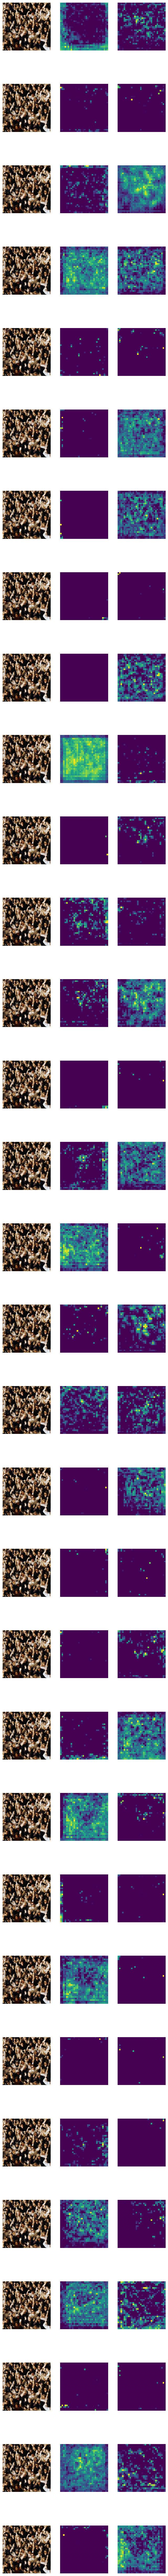

In [81]:
x = crowds[5]
y = csrnet(x)

z = x
z = csrnet.frontend(z)
z = csrnet.backend(z)
z = z.detach()

fig, ax = plt.subplots(32, 3, figsize=(8, 128))
x = x.permute(1, 2, 0)
y = y.detach()[0]
# ax[0, 0].imshow(x)
# ax[0, 0].axis('off')
# ax[0, 1].imshow(y)
# ax[0, 1].axis('off')

for i in range(32):
    ax[i, 0].imshow(x)
    ax[i, 0].axis('off')
    ax[i, 1].imshow(z[i])
    ax[i, 1].axis('off')
    ax[i, 2].axis('off')
    ax[i, 2].imshow(z[32 + i])

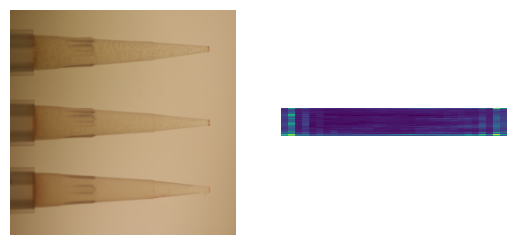

In [73]:
x = bacteria[5]
y = csrnet(x)

fig, ax = plt.subplots(1, 2)
x = x.permute(1, 2, 0)
y = y.detach()[0]
ax[0].imshow(x)
ax[1].imshow(y)
for i in range(2):
    ax[i].axis('off')

In [ ]:
THRESH_1 = 10
THRESH_2 = 15

rng.seed(12345)

canny_output = cv.Canny(images[0], 10, 15)
contours, _ = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(contours)
radius = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv.approxPolyDP(c, 3, True)
    boundRect[i] = cv.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

In [ ]:
print(len(contours))

85782


In [ ]:
drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
for i in range(len(contours[1:20])):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours_poly, i, color)
    cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
    (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
    cv.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)

In [ ]:
cv.imshow('Contours', drawing)

### Test out YOLO

In [ ]:
import yolov5
from torchsummary import summary

In [ ]:
model = yolov5.load('keremberke/yolov5n-blood-cell')

YOLOv5  2023-10-25 Python-3.11.5 torch-2.1.0+cpu CPU



Fusing layers... 
Model summary: 157 layers, 1763224 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


In [ ]:
result = model(images[1])
predictions = result.pred[0]
print(predictions)
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

tensor([], size=(0, 6))


In [ ]:
print(boxes)

tensor([], size=(0, 4))


In [ ]:
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

# set image
img = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model(img, size=640)

# inference with test time augmentation
results = model(img, augment=True)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

In [ ]:
print(boxes)

tensor([[1187.03088,  543.88135, 1278.18689,  720.00000]])


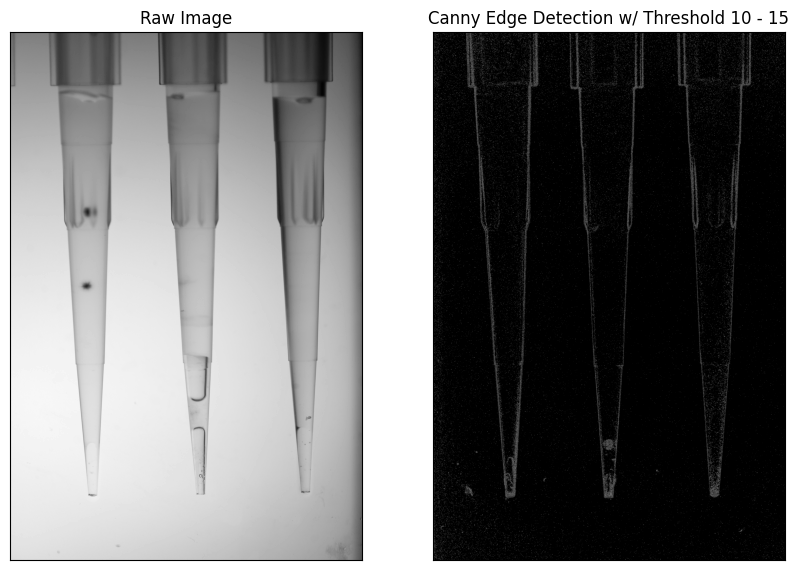

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(img, cmap='gray')
axes[0].title.set_text("Raw Image")
axes[0].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)

axes[1].imshow(canny_out_10_15, cmap='gray')
axes[1].title.set_text("Canny Edge Detection w/ Threshold 10 - 15")
axes[1].get_yaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)